# Mall Customer Clustering
Pada modul kali ini, akan dilakukan *clustering* pelanggan berdasarkan jenis kelamin, umur, pendapatan per tahun, dan skor pengeluaran yang telah dikuantifikasi. Metode yang akan digunakan adalah **K-Means Clustering**.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Setelah semua data bersifat numerik, kita drop *CustomerID* karena diasumsikan tidak terlalu relevan dengan *clustering* yang akan kita lakukan.

In [39]:
df = df.drop('CustomerID', axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Exploratory Data Analysis
Untuk mendapatkan hasil yang lebih optimal, kita perlu mempertimbangkan variabel mana saja yang sebaiknya digunakan untuk pembangunan model. Yang pertama adalah variabel *Gender*. Karena *Gender* bersifat kategorikal, patut dipertanyakan apakah perbedaan *Gender* berpengaruh pada persebaran pelanggan.

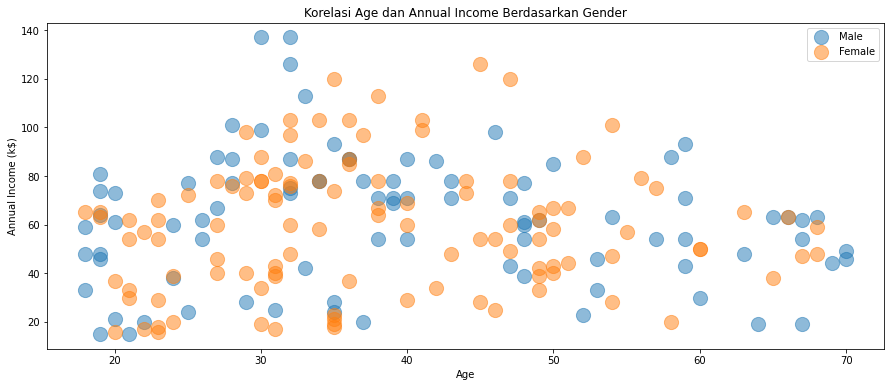

In [40]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Korelasi Age dan Annual Income Berdasarkan Gender')
plt.legend()
plt.show()

Dari *scatterplot* di atas, dapat dilihat bahwa perbedaan *Gender* tidak terlalu berpengaruh pada pengelompokan konsumen dari segi pendapatan dan umur. Kesimpulan ini diambil karena titik-titik berwarna oranye dan biru tersebar merata.

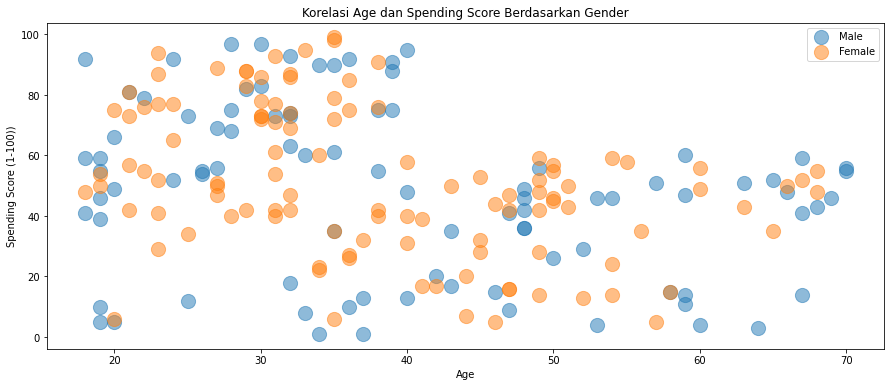

In [41]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Spending Score (1-100)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100))') 
plt.title('Korelasi Age dan Spending Score Berdasarkan Gender')
plt.legend()
plt.show()

Dari *scatterplot* di atas, dapat dilihat bahwa perbedaan *Gender* tidak terlalu berpengaruh pada pengelompokan konsumen dari skor pengeluaran dan umur. Kesimpulan ini diambil karena titik-titik berwarna oranye dan biru tersebar merata.

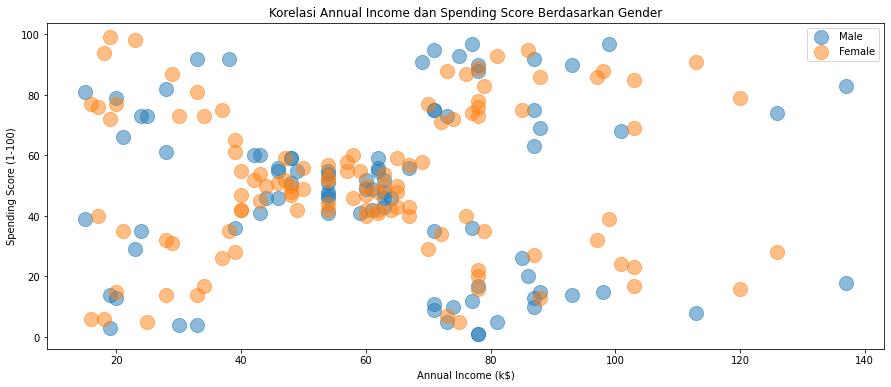

In [42]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Korelasi Annual Income dan Spending Score Berdasarkan Gender')
plt.legend()
plt.show()

Dari *scatterplot* di atas, dapat dilihat bahwa perbedaan *Gender* tidak terlalu berpengaruh pada pengelompokan konsumen dari pendapatan dan pengeluaran. Kesimpulan ini diambil karena titik-titik berwarna oranye dan biru tersebar merata. Hal menarik lain yang dapat diambil dari *scatterplot* terakhir adalah bahwa pada saat membandingkan *annual income* dan *spending score*, persebaran konsumen seolah terbagi menjadi 5 kelompok yang perbedaan lokasi antar kelompoknya cukup jauh.

Dari ketiga *scatterplot* yang telah dilakukan, dapat diambil kesimpulan bahwa variabel *Gender* tidak perlu digunakan dalam pengelompokan, karena kurang signifikannya perbedaan yang dihasilkan oleh keberadaan variabel ini dalam ketiga kasus.

In [43]:
df = df.drop(['Gender'], axis = 1)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Sekarang, kita memiliki 3 variabel yang berbeda. Dari hasil eksplorasi, patut diingat bahwa *Spending Score* dan *Annual Income* memiliki persebaran kelompok yang cukup jelas perbedaannya. Namun kita juga masih memiliki variabel *Age* yang bisa berdampak pula bagi pengelompokkan. Karena itu, akan dilakukan *Silhouette Method* untuk mendapatkan koefisien siluet untuk 2 variabel dan 3 variabel. Koefisien siluet tertinggi akan menentukan variabel yang akan kita gunakan beserta nilai k yang akan dipakai untuk membuat model.

## Silhouette Method
*Silhouette Method* merupakan metode yang dilakukan untuk mencari nilai k yang optimal dari sekelompok data. Akan dicari koefisien siluet tertinggi dari beberapa nilai k, dan k dimana koefisien siluetnya tertinggi sebaiknya digunakan sebagai nilai k yang akan diimplementasikan pada pembuatan model kita. Namun sebelum mengaplikasikan metode siluet, akan dilakukan *standard scaling* untuk membuat nilai seluruh baris dan kolom lebih mudah untuk memastikan setiap nilai bersifat **zero-mean** dan **unit-variance**.

### Standard Scaling

In [44]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df.columns.tolist()
df[column_names] = scaler.fit_transform(df[column_names])
df.sort_index(inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


### 2 Variabel

In [45]:
df2 = df.drop(['Age'], axis = 1)
df2

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [46]:
X2 = df2.to_numpy()
X2

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [47]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X2)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X2, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.28953270137686243
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.4939069237513199
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5380630705007141
For n_clusters=7, The Silhouette Coefficient is 0.5263454490712252
For n_clusters=8, The Silhouette Coefficient is 0.45317028376017787
For n_clusters=9, The Silhouette Coefficient is 0.455477460588866
For n_clusters=10, The Silhouette Coefficient is 0.4476280825932578


Dari keterangan di atas, dapat dilihat bahwa k dengan koefisien siluet tertinggi adalah **k = 5** dengan koefisien siluet **0.5547**. Selanjutnya kita coba *Silhouette Model* dengan 3 Variabel.
### 3 Variabel

In [48]:
X3 = df.to_numpy()
X3

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [49]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X3)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X3, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.33547192894004574
For n_clusters=3, The Silhouette Coefficient is 0.357793388710272
For n_clusters=4, The Silhouette Coefficient is 0.4039582785148566
For n_clusters=5, The Silhouette Coefficient is 0.41664341513732767
For n_clusters=6, The Silhouette Coefficient is 0.4268547747113388
For n_clusters=7, The Silhouette Coefficient is 0.417231894954916
For n_clusters=8, The Silhouette Coefficient is 0.4092057729049121
For n_clusters=9, The Silhouette Coefficient is 0.41831012641905574
For n_clusters=10, The Silhouette Coefficient is 0.3933675804240833


Dari keterangan di atas, dapat dilihat bahwa k dengan koefisien siluet tertinggi adalah **k = 6** dengan koefisien siluet **0.4268**. Secara umum, koefisien tertinggi dari kasus 2 dan 3 variabel ada pada **2 variabel dengan k = 5**, karena itu, kedua nilai inilah yang akan kita gunakan dalam pengelompokkan utama kita.

## K-Means Clustering
*K-Means Clustering* merupakan metode pengelompokkan berdasarkan k jumlah titik pusat. 

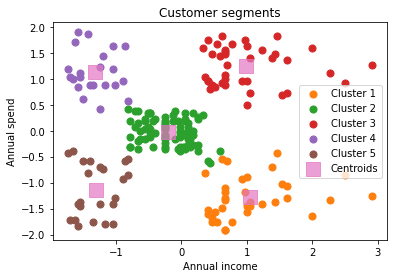

In [50]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(X2)

# Visualising Clusters for k=5
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', data=df2)
plt.scatter(X2[cluster == 0, 0], X2[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(X2[cluster == 1, 0], X2[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(X2[cluster == 2, 0], X2[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(X2[cluster == 3, 0], X2[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(X2[cluster == 4, 0], X2[cluster == 4, 1], s = 50, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

## Kesimpulan

Dari hasil plot, dapat dilihat bahwa pelanggan telah kita bagi menjadi 5 kluster, yaitu:
1. Cluster 1 = Pendapatan tinggi, pengeluaran rendah
2. Cluster 2 = Pendapatan menengah, pengeluaran menengah
3. Cluster 3 = Pendapatan tinggi, pengeluaran tinggi
4. Cluster 4 = Pendapatan rendah, pengeluaran tinggi
5. Cluster 5 = Pendapatan rendah, pengeluaran rendah.

## Alternatif: Menggunakan Variabel Age dalam Pembuatan Model

In [51]:
# Apply the K-Means Model to the Data
kmeans_alt = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_alt = kmeans_alt.fit_predict(X3)
labels_alt = kmeans_alt.labels_
centroids_alt = kmeans_alt.cluster_centers_

In [52]:
import plotly as py
import plotly.graph_objs as go

df['label'] =  labels_alt
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label'], 
        size= 20,
        line=dict(
            color= df['label'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Cluster 3 Variabel',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [53]:
df

,Age,Annual Income (k$),Spending Score (1-100),label
0,-1.424569,-1.738999,-0.434801,5
1,-1.281035,-1.738999,1.195704,5
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,5
4,-0.563369,-1.662660,-0.395980,4
...,...,...,...,...
195,-0.276302,2.268791,1.118061,2
196,0.441365,2.497807,-0.861839,3
197,-0.491602,2.497807,0.923953,2
198,-0.491602,2.917671,-1.250054,3


Untuk dapat memahami grafik 3d tersebut, mari kita breakdown dan deskripsikan tiap klusternya.

In [62]:
df_0 = df[df['label']==0]
df_1 = df[df['label']==1]
df_2 = df[df['label']==2]
df_3 = df[df['label']==3]
df_4 = df[df['label']==4]
df_5 = df[df['label']==5]

In [60]:
df_0.describe()

,Age,Annual Income (k$),Spending Score (1-100),label
count,38.000000,38.000000,38.000000,38.0
mean,-0.850435,-0.148941,-0.041478,0.0
std,0.504717,0.378095,0.304904,0.0
min,-1.496335,-0.822933,-0.823017,0.0
25%,-1.281035,-0.479408,-0.318337,0.0
50%,-0.886319,-0.040460,-0.007764,0.0
75%,-0.509543,0.121760,0.186343,0.0
max,0.082532,0.589336,0.419273,0.0


In [56]:
df_1.describe()

,Age,Annual Income (k$),Spending Score (1-100),label
count,45.000000,45.000000,45.000000,45.0
mean,1.254721,-0.240213,-0.043998,1.0
std,0.606650,0.342598,0.244607,0.0
min,0.297832,-0.861102,-0.590088,1.0
25%,0.728432,-0.517577,-0.201872,1.0
50%,1.087265,-0.250391,-0.046586,1.0
75%,1.876699,0.054964,0.186343,1.0
max,2.235532,0.703844,0.380451,1.0


In [57]:
df_2.describe()

,Age,Annual Income (k$),Spending Score (1-100),label
count,39.000000,39.000000,39.000000,39.0
mean,-0.441917,0.991583,1.239503,2.0
std,0.267593,0.622638,0.363544,0.0
min,-0.850435,0.322150,0.496916,2.0
25%,-0.635135,0.570251,0.943364,2.0
50%,-0.491602,0.703844,1.273347,2.0
75%,-0.240418,1.314555,1.545098,2.0
max,0.082532,2.917671,1.816849,2.0


In [58]:
df_3.describe()

,Age,Annual Income (k$),Spending Score (1-100),label
count,34.000000,34.000000,34.000000,34.0
mean,0.173295,1.066454,-1.298010,3.0
std,0.772811,0.631065,0.383607,0.0
min,-1.424569,0.398489,-1.910021,3.0
25%,-0.312185,0.637048,-1.560627,3.0
50%,0.261948,0.951946,-1.347108,3.0
75%,0.584899,1.419521,-1.065652,3.0
max,1.446099,2.917671,-0.434801,3.0


In [59]:
df_4.describe()

,Age,Annual Income (k$),Spending Score (1-100),label
count,21.000000,21.000000,21.000000,21.0
mean,0.478957,-1.308230,-1.196444,4.0
std,0.844477,0.283880,0.487435,0.0
min,-1.352802,-1.700830,-1.832378,4.0
25%,-0.204535,-1.548152,-1.715913,4.0
50%,0.513132,-1.357305,-1.366519,4.0
75%,1.015499,-1.051949,-0.745374,4.0
max,2.020232,-0.822933,-0.395980,4.0


In [63]:
df_5.describe()

,Age,Annual Income (k$),Spending Score (1-100),label
count,23.000000,23.000000,23.000000,23.0
mean,-0.993969,-1.347348,1.064048,5.0
std,0.380370,0.294811,0.515257,0.0
min,-1.496335,-1.738999,-0.434801,5.0
25%,-1.281035,-1.586321,0.885132,5.0
50%,-1.137502,-1.395474,1.040418,5.0
75%,-0.671019,-1.109204,1.331580,5.0
max,-0.276302,-0.822933,1.894492,5.0


## Kesimpulan Alternatif

Dari hasil *mean* pada deskripsi keenam kluster, dapat dilihat bahwa pelanggan telah kita bagi menjadi 6 kluster, yaitu:
1. Cluster 0 = Umur muda, pendapatan menengah, pengeluaran menengah
2. Cluster 1 = Umur tua, pendapatan menengah, pengeluaran menengah
3. Cluster 2 = Umur muda, pendapatan tinggi, pengeluaran tinggi
4. Cluster 3 = Umur tua, pendapatan tinggi, pengeluaran rendah
5. Cluster 4 = Umur tua, pendapatan rendah, pengeluaran rendah
6. Cluster 5 = Umur muda, pendapatn rendah, pengeluaran tinggi